# Gráfico Multilíneas

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('tienda_ventas.csv', index_col='id')
df['mes'] = df['date'].apply(lambda x: x [:7])
por_mes = df.groupby('mes').agg({
    'sales': 'sum'
})
fig = px.line(
    por_mes,
    x=por_mes.index.values,
    y='sales'
)
fig.show()

In [3]:
df['anio'] = df['date'].apply(lambda x: x[:4])
df

,date,store_nbr,family,sales,onpromotion,mes,anio
id,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01,2013
1,2013-01-01,1,BABY CARE,0.00000,0,2013-01,2013
2,2013-01-01,1,BEAUTY,0.00000,0,2013-01,2013
3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01,2013
4,2013-01-01,1,BOOKS,0.00000,0,2013-01,2013
...,...,...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04,2016
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04,2016
2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04,2016


In [6]:
df_2015 = df[
    (df['anio'] == '2015') &
    (df['family'].isin(['SEAFOOD','MEATS','DAIRY']))
]
df_2015

,date,store_nbr,family,sales,onpromotion,mes,anio
id,,,,,,,
1297304,2015-01-01,1,DAIRY,0.000,0,2015-01,2015
1297320,2015-01-01,1,MEATS,0.000,0,2015-01,2015
1297328,2015-01-01,1,SEAFOOD,0.000,0,2015-01,2015
1297337,2015-01-01,10,DAIRY,0.000,0,2015-01,2015
1297353,2015-01-01,10,MEATS,0.000,0,2015-01,2015
...,...,...,...,...,...,...,...
1945902,2015-12-31,8,MEATS,382.466,0,2015-12,2015
1945910,2015-12-31,8,SEAFOOD,21.428,0,2015-12,2015
1945919,2015-12-31,9,DAIRY,878.000,1,2015-12,2015


In [7]:
agrupacion = df_2015.groupby(['mes','family']).agg({
    'sales': 'sum'
})
agrupacion

sales
mes     family               
2015-01 DAIRY    1.134521e+06
        MEATS    5.431177e+05
        SEAFOOD  4.046584e+04
2015-02 DAIRY    1.020747e+06
        MEATS    4.987351e+05
        SEAFOOD  3.606656e+04
2015-03 DAIRY    1.234851e+06
        MEATS    5.465172e+05
        SEAFOOD  4.380847e+04
2015-04 DAIRY    1.181180e+06
        MEATS    5.223043e+05
        SEAFOOD  3.998347e+04
2015-05 DAIRY    1.293308e+06
        MEATS    5.916919e+05
        SEAFOOD  4.250683e+04
2015-06 DAIRY    1.243588e+06
        MEATS    5.650141e+05
        SEAFOOD  3.878055e+04
2015-07 DAIRY    1.244815e+06
        MEATS    5.949037e+05
        SEAFOOD  3.853559e+04
2015-08 DAIRY    1.263428e+06
        MEATS    5.812141e+05
        SEAFOOD  3.776758e+04
2015-09 DAIRY    1.224619e+06
        MEATS    5.627116e+05
        SEAFOOD  4.190637e+04
2015-10 DAIRY    1.314827e+06
        MEATS    5.807884e+05
        SEAFOOD  4.142396e+04
2015-11 DAIRY    1.283672e+06
        MEATS    5.359089e+05
        SEAFOOD  3.882376e+04
2015-12 DAIRY    1.394582e+06
        MEATS    5.673814e+05
        SEAFOOD  3.372828e+04

In [8]:
# Convertimos en columna
pivotado = agrupacion.reset_index(1)
pivotado

,family,sales
mes,,
2015-01,DAIRY,1.134521e+06
2015-01,MEATS,5.431177e+05
2015-01,SEAFOOD,4.046584e+04
2015-02,DAIRY,1.020747e+06
2015-02,MEATS,4.987351e+05
2015-02,SEAFOOD,3.606656e+04
2015-03,DAIRY,1.234851e+06
2015-03,MEATS,5.465172e+05
2015-03,SEAFOOD,4.380847e+04


In [10]:
# Pivoteamos
pivotado = agrupacion.reset_index(1).pivot(columns='family').droplevel(0, axis='columns') # Drop level quita el index de 'sales'
pivotado

family,DAIRY,MEATS,SEAFOOD
mes,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


array([<Axes: xlabel='mes'>, <Axes: xlabel='mes'>, <Axes: xlabel='mes'>],
      dtype=object)

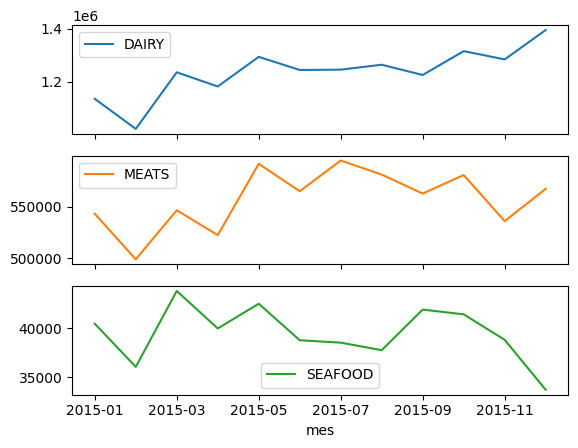

In [12]:
pivotado.plot.line(
    subplots=True
)